In [36]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import csv

plt.rcParams['figure.figsize']=(21,6)
plt.rcParams['axes.linewidth'] = 3
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=20)
plt.rc('legend', fontsize=18)
plt.rcParams['lines.markersize'] = 10
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.major.size']=10
plt.rcParams['xtick.major.width']=2
plt.rcParams['ytick.major.size']=10
plt.rcParams['ytick.major.width']=2
plt.rcParams['legend.edgecolor']='k'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams['xtick.major.pad'] = 15
plt.rcParams['ytick.major.pad'] = 15
plt.rcParams['legend.handletextpad']=0.4
plt.rcParams['legend.columnspacing']=0.5
plt.rcParams['legend.labelspacing']=0.3
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['axes.formatter.limits']=(-3, 6)
plt.rcParams['hatch.linewidth'] = 5.0
plt.rcParams['axes.titlepad'] = 20 

colormap=plt.cm.tab10
colors = [colormap(i) for i in np.linspace(0, 1, 10)]

colormap=plt.cm.Dark2
colors2 = [colormap(i) for i in np.linspace(0, 1, 8)]

In [37]:
no_important=2

def sensitivity(path):
    sens=pd.read_csv(path + '/allsens_total.dat', sep=" ", header=None)
    names=pd.read_csv(path + '/pnames.txt', sep=" ", header=None)
    names=names[0].to_numpy()
    sens=sens.iloc[0].to_numpy()
    
    indices=np.argsort(sens)

    sorted_sens=np.zeros(len(indices))

    sorted_names=[]
    for i in range(len(indices)):
        sorted_sens[i]=sens[indices[i]]
        sorted_names.append(names[indices[i]])

    # Store only the three most important sensitivity coefficients in the dictionary    
    res = {sorted_names[-i-1]: sorted_sens[-i-1] for i in range(no_important)}
    
    return res

co2_peak_temp=sensitivity('temp_co2_peak')
co_peak_temp=sensitivity('temp_co_peak')
co2_peak=sensitivity('co2_peak')
co_peak=sensitivity('co_peak')

nodiff_co2_peak_temp=sensitivity('nodiff_temp_co2_peak')
nodiff_co_peak_temp=sensitivity('nodiff_temp_co_peak')
nodiff_co2_peak=sensitivity('nodiff_co2_peak')
nodiff_co_peak=sensitivity('nodiff_co_peak')

In [21]:
co2_peak_temp

{'C(111)': 0.3127055250108445, 'OC(111)': 0.2045026423010483}

In [22]:
co_peak_temp

{'COdiss(110)': 0.3963114627311614, 'CO2diss(110)': 0.23338703527425547}

In [23]:
nodiff_co2_peak_temp

{'COdiss(100)': 0.8179725490231947, 'COdiss(111)': 0.5528201457657156}

In [24]:
nodiff_co_peak_temp

{'COdiss(100)': 0.7448624834161197, 'COdiss(111)': 0.633310897706869}

In [13]:
co2_peak

{'O100_110': 0.8803886858489843, 'O100_211': 0.49690828206984894}

In [14]:
co_peak

{'COdiss(110)': 0.4557606263403247, 'CO2(211)': 0.2182275023285672}

In [15]:
nodiff_co2_peak

{'CO2(100)': 0.4078859750315288, 'C(111)': 0.3945518182227204}

In [16]:
nodiff_co_peak

{'CO2(211)': 0.3004321225678102, 'C(111)': 0.2575868562358063}

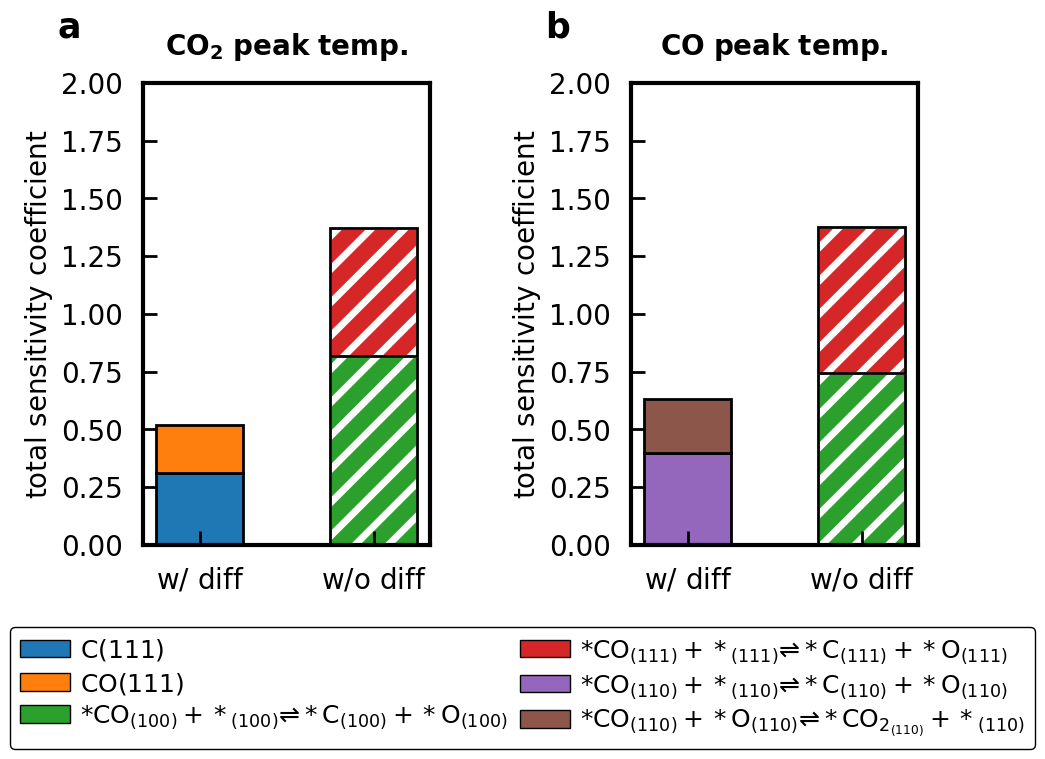

In [50]:
color_dict={'C(111)': colors[0],
           'OC(111)':colors[1],
           'COdiss(100)':colors[2],
           'COdiss(111)':colors[3],
           'COdiss(110)':colors[4],
           'CO2diss(110)':colors[5],
           'O100_110':colors[6],
           'O100_211':colors[7],
           'CO2(100)':colors[8],
           'CO2(211)': colors[9]
           }

plt.rcParams['figure.figsize']=(10,6)
gs=gridspec.GridSpec(nrows=1, ncols=2)
gs.update(wspace=0.7,hspace=0.5)

axes = [plt.subplot(gs[0, i]) for i in range(2)]

for ax in axes:
    ax.set_ylim([0, 2])
    ax.set_ylabel(r'$\mathrm{total\ sensitivity\ coefficient}$')
    ax.set_xticks([0, 1])
    ax.set_xticklabels([r'$\mathrm{w/\ diff}$', r'$\mathrm{w/o\ diff}$'])

def plot_sens(ax,feature,pos,case):
    
    names=list(feature.keys())
    values=list(feature.values())
    
    if str(case).startswith('nodiff'):
        ax.bar(pos,values[0],0.5, edgecolor='w', color=color_dict[names[0]], linewidth=2, hatch="/")
        ax.bar(pos,values[0],0.5, edgecolor='k', color='None', linewidth=2)
        sens_sum=values[0]
        for i in range(no_important-1):
            ax.bar(pos, values[i+1], 0.5,edgecolor='w', bottom=sens_sum, color=color_dict[names[i+1]], linewidth=2, hatch="/")
            ax.bar(pos, values[i+1], 0.5,edgecolor='k', bottom=sens_sum, color='None', linewidth=2)
            sens_sum+=values[i+1]  

    else: 
        ax.bar(pos,values[0],0.5, edgecolor='k', color=color_dict[names[0]], linewidth=2)
        sens_sum=values[0]
        for i in range(no_important-1):
            ax.bar(pos, values[i+1], 0.5,edgecolor='k', bottom=sens_sum, color=color_dict[names[i+1]], linewidth=2)
            sens_sum+=values[i+1]    
        
    return

plot_sens(axes[0], co2_peak_temp,0,'diff')
plot_sens(axes[0], nodiff_co2_peak_temp,1,'nodiff')

plot_sens(axes[1], co_peak_temp,0,'diff')
plot_sens(axes[1], nodiff_co_peak_temp,1,'nodiff')

axes[0].set_title('$\mathbf{CO_2\ peak\ temp.}$',fontsize=20)
axes[1].set_title('$\mathbf{CO\ peak\ temp.}$',fontsize=20)
            
import matplotlib.patches as mpatches
patch_C111=mpatches.Patch(facecolor=colors[0], edgecolor='k', label='$\mathrm{C(111)}$')
patch_CO111=mpatches.Patch(facecolor=colors[1], edgecolor='k', label='$\mathrm{CO(111)}$')
patch_COdiss100=mpatches.Patch(facecolor=colors[2], edgecolor='k', label='$\mathrm{*CO_{(100)}+*_{(100)}\u21cc*C_{(100)}+*O_{(100)}}$')
patch_COdiss111=mpatches.Patch(facecolor=colors[3], edgecolor='k', label='$\mathrm{*CO_{(111)}+*_{(111)}\u21cc*C_{(111)}+*O_{(111)}}$')
patch_COdiss110=mpatches.Patch(facecolor=colors[4], edgecolor='k', label='$\mathrm{*CO_{(110)}+*_{(110)}\u21cc*C_{(110)}+*O_{(110)}}$')
patch_CO2diss110=mpatches.Patch(facecolor=colors[5], edgecolor='k', label='$\mathrm{*CO_{(110)}+*O_{(110)}\u21cc*CO_{2_{(110)}}+*_{(110)}}$')
patch_O100_110=mpatches.Patch(facecolor=colors[6], edgecolor='k', label='$\mathrm{*O_{(100)}+*_{(110)}\u21cc*CO_{(110)}+*_{(100)}}$')
patch_O100_211=mpatches.Patch(facecolor=colors[7], edgecolor='k', label='$\mathrm{*O_{(100)}+*_{(211)}\u21cc*CO_{(211)}+*_{(100)}}$')
patch_CO2100=mpatches.Patch(facecolor=colors[8], edgecolor='k', label='$\mathrm{CO_2(100)}$')
patch_CO2211=mpatches.Patch(facecolor=colors[9], edgecolor='k', label='$\mathrm{CO_2(211)}$')

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles=[patch_C111,patch_CO111,patch_COdiss100,patch_COdiss111,patch_COdiss110,
                    patch_CO2diss110],ncol=2,bbox_to_anchor=(3.15,-0.15))

import string 
axes[0].text(-0.3, 1.1, string.ascii_lowercase[0], transform=axes[0].transAxes, size=25, weight='bold')
axes[1].text(-0.3, 1.1, string.ascii_lowercase[1], transform=axes[1].transAxes, size=25, weight='bold')

plt.savefig('sensitivity_analysis_peak_temp.pdf',bbox_inches='tight')
plt.show()

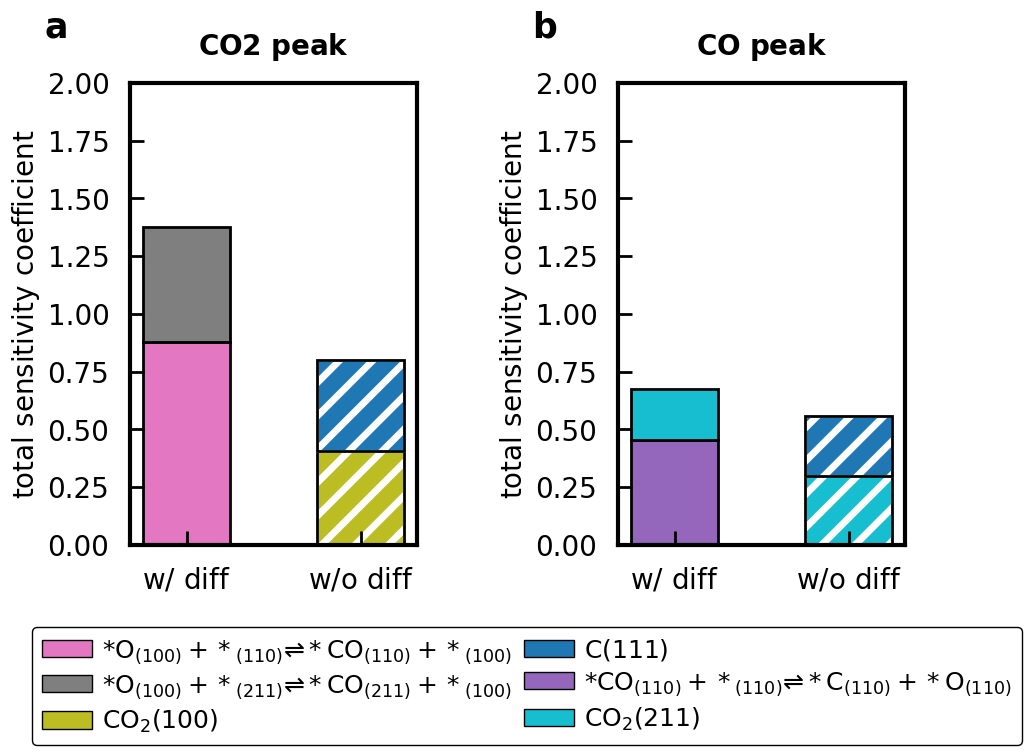

In [51]:
color_dict={'C(111)': colors[0],
           'OC(111)':colors[1],
           'COdiss(100)':colors[2],
           'COdiss(111)':colors[3],
           'COdiss(110)':colors[4],
           'CO2diss(110)':colors[5],
           'O100_110':colors[6],
           'O100_211':colors[7],
           'CO2(100)':colors[8],
           'CO2(211)': colors[9]
           }

plt.rcParams['figure.figsize']=(10,6)
gs=gridspec.GridSpec(nrows=1, ncols=2)
gs.update(wspace=0.7,hspace=0.5)

axes = [plt.subplot(gs[0, i]) for i in range(2)]

for ax in axes:
    ax.set_ylim([0, 2])
    ax.set_ylabel(r'$\mathrm{total\ sensitivity\ coefficient}$')
    ax.set_xticks([0, 1])
    ax.set_xticklabels([r'$\mathrm{w/\ diff}$', r'$\mathrm{w/o\ diff}$'])

def plot_sens(ax,feature,pos,case):
    
    names=list(feature.keys())
    values=list(feature.values())
    
    if str(case).startswith('nodiff'):
        ax.bar(pos,values[0],0.5, edgecolor='w', color=color_dict[names[0]], linewidth=2, hatch="/")
        ax.bar(pos,values[0],0.5, edgecolor='k', color='None', linewidth=2)
        sens_sum=values[0]
        for i in range(no_important-1):
            ax.bar(pos, values[i+1], 0.5,edgecolor='w', bottom=sens_sum, color=color_dict[names[i+1]], linewidth=2, hatch="/")
            ax.bar(pos, values[i+1], 0.5,edgecolor='k', bottom=sens_sum, color='None', linewidth=2)
            sens_sum+=values[i+1]  

    else: 
        ax.bar(pos,values[0],0.5, edgecolor='k', color=color_dict[names[0]], linewidth=2)
        sens_sum=values[0]
        for i in range(no_important-1):
            ax.bar(pos, values[i+1], 0.5,edgecolor='k', bottom=sens_sum, color=color_dict[names[i+1]], linewidth=2)
            sens_sum+=values[i+1]    
        
    return

plot_sens(axes[0], co2_peak,0,'diff')
plot_sens(axes[0], nodiff_co2_peak,1,'nodiff')

plot_sens(axes[1], co_peak,0,'diff')
plot_sens(axes[1], nodiff_co_peak,1,'nodiff')

axes[0].set_title('$\mathbf{CO2\ peak}$',fontsize=20)
axes[1].set_title('$\mathbf{CO\ peak}$',fontsize=20)
            
import matplotlib.patches as mpatches
patch_C111=mpatches.Patch(facecolor=colors[0], edgecolor='k', label='$\mathrm{C(111)}$')
patch_CO111=mpatches.Patch(facecolor=colors[1], edgecolor='k', label='$\mathrm{CO(111)}$')
patch_COdiss100=mpatches.Patch(facecolor=colors[2], edgecolor='k', label='$\mathrm{*CO_{(100)}+*_{(100)}\u21cc*C_{(100)}+*O_{(100)}}$')
patch_COdiss111=mpatches.Patch(facecolor=colors[3], edgecolor='k', label='$\mathrm{*CO_{(111)}+*_{(111)}\u21cc*C_{(111)}+*O_{(111)}}$')
patch_COdiss110=mpatches.Patch(facecolor=colors[4], edgecolor='k', label='$\mathrm{*CO_{(110)}+*_{(110)}\u21cc*C_{(110)}+*O_{(110)}}$')
patch_CO2diss110=mpatches.Patch(facecolor=colors[5], edgecolor='k', label='$\mathrm{*CO_{(110)}+*O_{(110)}\u21cc*CO_{2_{(110)}}+*_{(110)}}$')
patch_O100_110=mpatches.Patch(facecolor=colors[6], edgecolor='k', label='$\mathrm{*O_{(100)}+*_{(110)}\u21cc*CO_{(110)}+*_{(100)}}$')
patch_O100_211=mpatches.Patch(facecolor=colors[7], edgecolor='k', label='$\mathrm{*O_{(100)}+*_{(211)}\u21cc*CO_{(211)}+*_{(100)}}$')
patch_CO2100=mpatches.Patch(facecolor=colors[8], edgecolor='k', label='$\mathrm{CO_2(100)}$')
patch_CO2211=mpatches.Patch(facecolor=colors[9], edgecolor='k', label='$\mathrm{CO_2(211)}$')

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles=[patch_O100_110,patch_O100_211,patch_CO2100,patch_C111,patch_COdiss110,
                    patch_CO2211],ncol=2,bbox_to_anchor=(3.15,-0.15))

import string 
axes[0].text(-0.3, 1.1, string.ascii_lowercase[0], transform=axes[0].transAxes, size=25, weight='bold')
axes[1].text(-0.3, 1.1, string.ascii_lowercase[1], transform=axes[1].transAxes, size=25, weight='bold')

plt.savefig('sensitivity_analysis_peak_height.pdf',bbox_inches='tight')
plt.show()

KeyError: 'O100_110'

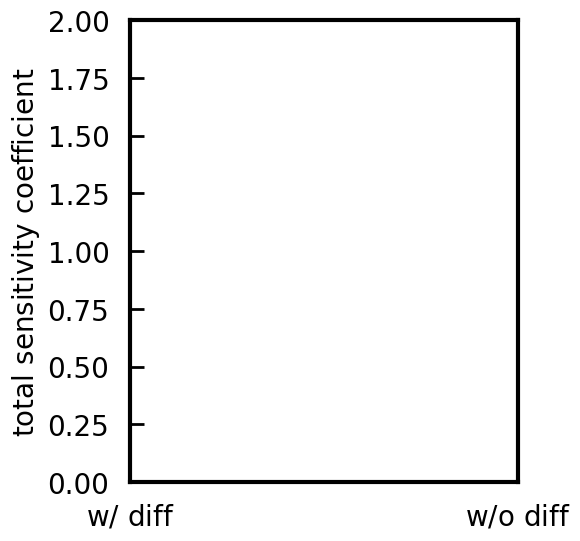

In [18]:
plt.rcParams['figure.figsize']=(5,6)
plt.rcParams['axes.linewidth'] = 3
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=20)
plt.rc('legend', fontsize=18)
plt.rcParams['lines.markersize'] = 10
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.major.size']=10
plt.rcParams['xtick.major.width']=2
plt.rcParams['ytick.major.size']=10
plt.rcParams['ytick.major.width']=2
plt.rcParams['legend.edgecolor']='k'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams['xtick.major.pad'] = 15
plt.rcParams['ytick.major.pad'] = 15
plt.rcParams['legend.handletextpad']=0.4
plt.rcParams['legend.columnspacing']=0.5
plt.rcParams['legend.labelspacing']=0.3
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['axes.formatter.limits']=(-3, 6)
plt.rcParams['hatch.linewidth'] = 5.0
plt.rcParams['axes.titlepad'] = 20 

colormap=plt.cm.Dark2
colors = [colormap(i) for i in np.linspace(0, 1, 8)]

color_dict={
           #'CO2(110)': colors[0],
           #'111':colors[1],
           'CO2(100)':colors[0],
           #'COdiss(211)':colors[3],
           #'COdiss(110)':colors[1],
           #'CO2(211)':colors[5],
           'CO111_110':colors[1],
           'CO111_211':colors[2],
           #'CO2diss(110)':colors[8],
           #'C(100)':colors[9],
           #'COdiss(100)': colors2[0],
           #'COdiss(111)': colors2[1],
            'C(110)': colors[3],
           # 'CO2(100)': colors2[3],
           # 'C(111)': colors2[4],
           }

gs=gridspec.GridSpec(nrows=1, ncols=1)
gs.update(wspace=0.7,hspace=0.5)

axes = [plt.subplot(gs[0, i]) for i in range(1)]

for ax in axes:
    ax.set_ylim([0, 2])
    ax.set_ylabel(r'$\mathrm{total\ sensitivity\ coefficient}$')
    ax.set_xticks([0, 1])
    ax.set_xticklabels([r'$\mathrm{w/\ diff}$', r'$\mathrm{w/o\ diff}$'])

def plot_sens(ax,feature,pos,case):
    
    names=list(feature.keys())
    values=list(feature.values())
    
    if str(case).startswith('nodiff'):
        ax.bar(pos,values[0],0.5, edgecolor='w', color=color_dict[names[0]], linewidth=2, hatch="/")
        ax.bar(pos,values[0],0.5, edgecolor='k', color='None', linewidth=2)
        sens_sum=values[0]
        for i in range(no_important-1):
            ax.bar(pos, values[i+1], 0.5,edgecolor='w', bottom=sens_sum, color=color_dict[names[i+1]], linewidth=2, hatch="/")
            ax.bar(pos, values[i+1], 0.5,edgecolor='k', bottom=sens_sum, color='None', linewidth=2)
            sens_sum+=values[i+1]  

    else: 
        ax.bar(pos,values[0],0.5, edgecolor='k', color=color_dict[names[0]], linewidth=2)
        sens_sum=values[0]
        for i in range(no_important-1):
            ax.bar(pos, values[i+1], 0.5,edgecolor='k', bottom=sens_sum, color=color_dict[names[i+1]], linewidth=2)
            sens_sum+=values[i+1]    
        
    return

# plot_sens(axes[0], co2_peak_temp,0,'diff')
# plot_sens(axes[0], nodiff_co2_peak_temp,1,'nodiff')

# plot_sens(axes[1], co_peak_temp,0,'diff')
# plot_sens(axes[1], nodiff_co_peak_temp,1,'nodiff')

plot_sens(axes[0], co2_peak,0,'diff')
plot_sens(axes[0], nodiff_co2_peak,1,'nodiff')

# plot_sens(axes[3], co_peak,0,'diff')
# plot_sens(axes[3], nodiff_co_peak,1,'nodiff')

# axes[0].set_title('$\mathbf{CO2\ peak\ temp.}$',fontsize=20)
# axes[1].set_title('$\mathbf{CO\ peak\ temp.}$',fontsize=20)
axes[0].set_title('$\mathbf{CO_2\ peak\ height}$',fontsize=20)
# axes[3].set_title('$\mathbf{CO\ peak}$',fontsize=20)

import matplotlib.patches as mpatches
#patch_CO2_110=mpatches.Patch(facecolor=colors[0], edgecolor='k', label='$\mathrm{CO_2(110)}$')
#patch_111=mpatches.Patch(facecolor=colors[1], edgecolor='k', label='$\mathrm{Ni(111)}$')
patch_CO2_100=mpatches.Patch(facecolor=colors[0], edgecolor='k', label='$\mathrm{CO_2(100)}$')
#patch_COdiss_211=mpatches.Patch(facecolor=colors[3], edgecolor='k', label='$\mathrm{*CO_{(211)}+*_{(211)}\u21cc*C_{(211)}+*O_{(211)}}$')
#patch_COdiss_110=mpatches.Patch(facecolor=colors[4], edgecolor='k', label='$\mathrm{*CO_{(110)}+*_{(110)}\u21cc*C_{(110)}+*O_{(110)}}$')
#patch_CO2_211=mpatches.Patch(facecolor=colors[5], edgecolor='k', label='$\mathrm{CO_2(211)}$')
patch_CO_111_110=mpatches.Patch(facecolor=colors[1], edgecolor='k', label='$\mathrm{*CO_{(111)}+*_{(110)}\u21cc*CO_{(110)}+*_{(111)}}$')
patch_CO_111_211=mpatches.Patch(facecolor=colors[2], edgecolor='k', label='$\mathrm{*CO_{(111)}+*_{(211)}\u21cc*CO_{(211)}+*_{(111)}}$')
#patch_CO2diss_110=mpatches.Patch(facecolor=colors[8], edgecolor='k', label='$\mathrm{*CO_{(110)}+*O_{(110)}\u21cc*CO_{2_{(110)}}+*_{(110)}}$')
#patch_C_100=mpatches.Patch(facecolor=colors[9], edgecolor='k', label='$\mathrm{C(100)}$')
#patch_COdiss_100=mpatches.Patch(facecolor=colors2[0], edgecolor='k', label='$\mathrm{*CO_{(100)}+*_{(100)}\u21cc*C_{(100)}+*O_{(100)}}$')
#patch_COdiss_111=mpatches.Patch(facecolor=colors2[1], edgecolor='k', label='$\mathrm{*CO_{(111)}+*_{(111)}\u21cc*C_{(111)}+*O_{(111)}}$')
patch_C_110=mpatches.Patch(facecolor=colors[3], edgecolor='k', label='$\mathrm{C(110)}$')
#patch_C_111=mpatches.Patch(facecolor=colors2[3], edgecolor='k', label='$\mathrm{C(111)}$')

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles=[patch_CO_111_110, patch_CO_111_211,patch_CO2_100,patch_C_110],ncol=1,bbox_to_anchor=(1.15,-0.15))

axes[0].set_yticks([0., 1, 2.])
#axes[0].set_yticklabels(["1/9", "2/9", "3/9", "4/9", "5/9", "6/9", "7/9", "8/9", "9/9"])

# import string 
# axes[0].text(-0.3, 1.1, string.ascii_lowercase[0], transform=axes[0].transAxes, size=25, weight='bold')
# axes[1].text(-0.3, 1.1, string.ascii_lowercase[1], transform=axes[1].transAxes, size=25, weight='bold')
# axes[2].text(-0.3, 1.1, string.ascii_lowercase[2], transform=axes[2].transAxes, size=25, weight='bold')
# axes[3].text(-0.3, 1.1, string.ascii_lowercase[3], transform=axes[3].transAxes, size=25, weight='bold')

plt.savefig('co2_peak_sensitvity_analysis.png',bbox_inches='tight',dpi=400,transparent=False)
plt.show()

KeyError: 'O100_110'

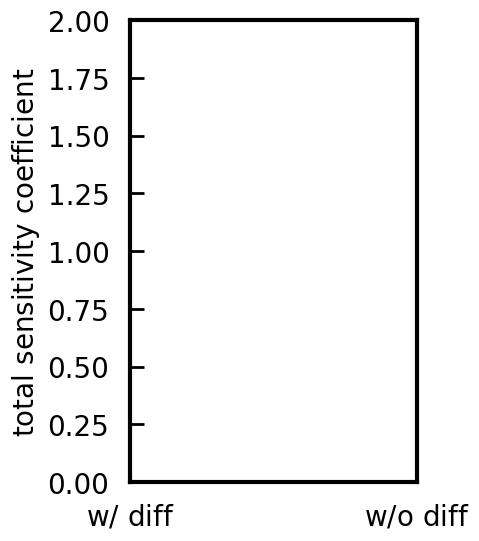

In [20]:
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['axes.linewidth'] = 3
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=20)
plt.rc('legend', fontsize=18)
plt.rcParams['lines.markersize'] = 10
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.major.size']=10
plt.rcParams['xtick.major.width']=2
plt.rcParams['ytick.major.size']=10
plt.rcParams['ytick.major.width']=2
plt.rcParams['legend.edgecolor']='k'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams['xtick.major.pad'] = 15
plt.rcParams['ytick.major.pad'] = 15
plt.rcParams['legend.handletextpad']=0.4
plt.rcParams['legend.columnspacing']=0.5
plt.rcParams['legend.labelspacing']=0.3
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['axes.formatter.limits']=(-3, 6)
plt.rcParams['hatch.linewidth'] = 5.0
plt.rcParams['axes.titlepad'] = 20 

colormap=plt.cm.Dark2
colors = [colormap(i) for i in np.linspace(0, 1, 8)]

color_dict={
           #'CO2(110)': colors[0],
           #'111':colors[1],
           'CO2(100)':colors[0],
           #'COdiss(211)':colors[3],
           #'COdiss(110)':colors[1],
           #'CO2(211)':colors[5],
           'CO111_110':colors[1],
           'CO111_211':colors[2],
           #'CO2diss(110)':colors[8],
           #'C(100)':colors[9],
           #'COdiss(100)': colors2[0],
           #'COdiss(111)': colors2[1],
            'C(110)': colors[3],
           # 'CO2(100)': colors2[3],
           # 'C(111)': colors2[4],
           }

gs=gridspec.GridSpec(nrows=1, ncols=2)
gs.update(wspace=0.7,hspace=0.5)

axes = [plt.subplot(gs[0, i]) for i in range(2)]

for ax in axes:
    ax.set_ylim([0, 2])
    ax.set_ylabel(r'$\mathrm{total\ sensitivity\ coefficient}$')
    ax.set_xticks([0, 1])
    ax.set_xticklabels([r'$\mathrm{w/\ diff}$', r'$\mathrm{w/o\ diff}$'])

def plot_sens(ax,feature,pos,case):
    
    names=list(feature.keys())
    values=list(feature.values())
    
    if str(case).startswith('nodiff'):
        ax.bar(pos,values[0],0.5, edgecolor='w', color=color_dict[names[0]], linewidth=2, hatch="/")
        ax.bar(pos,values[0],0.5, edgecolor='k', color='None', linewidth=2)
        sens_sum=values[0]
        for i in range(no_important-1):
            ax.bar(pos, values[i+1], 0.5,edgecolor='w', bottom=sens_sum, color=color_dict[names[i+1]], linewidth=2, hatch="/")
            ax.bar(pos, values[i+1], 0.5,edgecolor='k', bottom=sens_sum, color='None', linewidth=2)
            sens_sum+=values[i+1]  

    else: 
        ax.bar(pos,values[0],0.5, edgecolor='k', color=color_dict[names[0]], linewidth=2)
        sens_sum=values[0]
        for i in range(no_important-1):
            ax.bar(pos, values[i+1], 0.5,edgecolor='k', bottom=sens_sum, color=color_dict[names[i+1]], linewidth=2)
            sens_sum+=values[i+1]    
        
    return

# plot_sens(axes[0], co2_peak_temp,0,'diff')
# plot_sens(axes[0], nodiff_co2_peak_temp,1,'nodiff')

# plot_sens(axes[1], co_peak_temp,0,'diff')
# plot_sens(axes[1], nodiff_co_peak_temp,1,'nodiff')

plot_sens(axes[0], co2_peak,0,'diff')
plot_sens(axes[0], nodiff_co2_peak,1,'nodiff')

# plot_sens(axes[3], co_peak,0,'diff')
# plot_sens(axes[3], nodiff_co_peak,1,'nodiff')

# axes[0].set_title('$\mathbf{CO2\ peak\ temp.}$',fontsize=20)
# axes[1].set_title('$\mathbf{CO\ peak\ temp.}$',fontsize=20)
axes[0].set_title('$\mathbf{CO_2\ peak\ height}$',fontsize=20)
# axes[3].set_title('$\mathbf{CO\ peak}$',fontsize=20)

import matplotlib.patches as mpatches
#patch_CO2_110=mpatches.Patch(facecolor=colors[0], edgecolor='k', label='$\mathrm{CO_2(110)}$')
#patch_111=mpatches.Patch(facecolor=colors[1], edgecolor='k', label='$\mathrm{Ni(111)}$')
patch_CO2_100=mpatches.Patch(facecolor=colors[0], edgecolor='k', label='$\mathrm{CO_2(100)}$')
#patch_COdiss_211=mpatches.Patch(facecolor=colors[3], edgecolor='k', label='$\mathrm{*CO_{(211)}+*_{(211)}\u21cc*C_{(211)}+*O_{(211)}}$')
#patch_COdiss_110=mpatches.Patch(facecolor=colors[4], edgecolor='k', label='$\mathrm{*CO_{(110)}+*_{(110)}\u21cc*C_{(110)}+*O_{(110)}}$')
#patch_CO2_211=mpatches.Patch(facecolor=colors[5], edgecolor='k', label='$\mathrm{CO_2(211)}$')
patch_CO_111_110=mpatches.Patch(facecolor=colors[1], edgecolor='k', label='$\mathrm{*CO_{(111)}+*_{(110)}\u21cc*CO_{(110)}+*_{(111)}}$')
patch_CO_111_211=mpatches.Patch(facecolor=colors[2], edgecolor='k', label='$\mathrm{*CO_{(111)}+*_{(211)}\u21cc*CO_{(211)}+*_{(111)}}$')
#patch_CO2diss_110=mpatches.Patch(facecolor=colors[8], edgecolor='k', label='$\mathrm{*CO_{(110)}+*O_{(110)}\u21cc*CO_{2_{(110)}}+*_{(110)}}$')
#patch_C_100=mpatches.Patch(facecolor=colors[9], edgecolor='k', label='$\mathrm{C(100)}$')
#patch_COdiss_100=mpatches.Patch(facecolor=colors2[0], edgecolor='k', label='$\mathrm{*CO_{(100)}+*_{(100)}\u21cc*C_{(100)}+*O_{(100)}}$')
#patch_COdiss_111=mpatches.Patch(facecolor=colors2[1], edgecolor='k', label='$\mathrm{*CO_{(111)}+*_{(111)}\u21cc*C_{(111)}+*O_{(111)}}$')
patch_C_110=mpatches.Patch(facecolor=colors[3], edgecolor='k', label='$\mathrm{C(110)}$')
#patch_C_111=mpatches.Patch(facecolor=colors2[3], edgecolor='k', label='$\mathrm{C(111)}$')

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles=[patch_CO_111_110, patch_CO_111_211,patch_CO2_100,patch_C_110],ncol=1,bbox_to_anchor=(1.15,-0.15))

axes[0].set_yticks([0., 1, 2.])
#axes[0].set_yticklabels(["1/9", "2/9", "3/9", "4/9", "5/9", "6/9", "7/9", "8/9", "9/9"])

# import string 
# axes[0].text(-0.3, 1.1, string.ascii_lowercase[0], transform=axes[0].transAxes, size=25, weight='bold')
# axes[1].text(-0.3, 1.1, string.ascii_lowercase[1], transform=axes[1].transAxes, size=25, weight='bold')
# axes[2].text(-0.3, 1.1, string.ascii_lowercase[2], transform=axes[2].transAxes, size=25, weight='bold')
# axes[3].text(-0.3, 1.1, string.ascii_lowercase[3], transform=axes[3].transAxes, size=25, weight='bold')

plt.savefig('peak_sensitvity_analysis.pdf',bbox_inches='tight',transparent=False)
plt.show()